In [62]:
# 1. Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): 
# zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. 
# Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату 
# (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). 
# Произвести расчет как с использованием intercept, так и без.
import numpy as np
X = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
X

array([ 35,  45, 190, 200,  40,  70,  54, 150, 120, 110])

In [63]:
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
y

array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [64]:
b = (np.mean(X*y) - np.mean(X)*np.mean(y))/(np.mean(X**2)-np.mean(X)**2)
b

2.620538882402765

In [65]:
a = np.mean(y) - b*np.mean(X)
a

444.1773573243596

In [66]:
y_hat = a + b*X
y_hat

array([535.89621821, 562.10160703, 942.07974498, 968.2851338 ,
       548.99891262, 627.61507909, 585.68645697, 837.25818968,
       758.64202321, 732.43663439])

In [67]:
y

array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

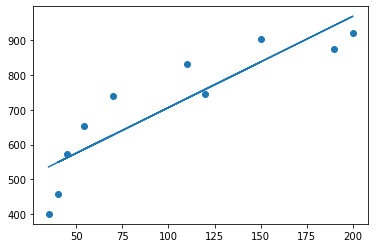

In [68]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(X,y)
plt.plot(X,a + b*X)
plt.show()

In [69]:
n = len(y_hat)
mse = ((y - y_hat)**2).sum()/n
mse

6470.414201176658

In [70]:
# С использованием intercept
X = X.reshape((10,1))
X

array([[ 35],
       [ 45],
       [190],
       [200],
       [ 40],
       [ 70],
       [ 54],
       [150],
       [120],
       [110]])

In [71]:
y = y.reshape((10,1))
y

array([[401],
       [574],
       [874],
       [919],
       [459],
       [739],
       [653],
       [902],
       [746],
       [832]])

In [72]:
X = np.hstack([np.ones((10,1)),X])
X

array([[  1.,  35.],
       [  1.,  45.],
       [  1., 190.],
       [  1., 200.],
       [  1.,  40.],
       [  1.,  70.],
       [  1.,  54.],
       [  1., 150.],
       [  1., 120.],
       [  1., 110.]])

In [73]:
B = np.dot(np.linalg.inv(np.dot(X.T,X)),X.T@y)
B

array([[444.17735732],
       [  2.62053888]])

In [74]:
# Без intercept
X = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
X = X.reshape((10,1))
X

array([[ 35],
       [ 45],
       [190],
       [200],
       [ 40],
       [ 70],
       [ 54],
       [150],
       [120],
       [110]])

In [75]:
y

array([[401],
       [574],
       [874],
       [919],
       [459],
       [739],
       [653],
       [902],
       [746],
       [832]])

In [76]:
B = np.dot(np.linalg.inv(np.dot(X.T,X)),X.T@y)
B

array([[5.88982042]])

In [77]:
# 2. Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).
X = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
X

array([ 35,  45, 190, 200,  40,  70,  54, 150, 120, 110])

In [78]:
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
y

array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [79]:
def mse_(B1,y=y,X=X,n=10):
    return np.sum((B1*X-y)**2)/n

In [80]:
alpha = 1e-6
B1 = 0.1
n = 10

In [81]:
 for i in range (1000):
     B1 -=alpha*(2/n)*np.sum((B1*X-y)*X)
     if i%20==0:
        print('Iteration: {i}, B1={B1}, mse={mse}'.format(i=i, B1=B1, mse=mse_(B1)))

Iteration: 0, B1=0.25952808, mse=493237.7212546963
Iteration: 20, B1=2.6698789606516935, mse=199352.96411174876
Iteration: 40, B1=4.04834889855975, mse=103233.54824312925
Iteration: 60, B1=4.836690291080364, mse=71796.25222021657
Iteration: 80, B1=5.287539550879594, mse=61514.21323463749
Iteration: 100, B1=5.54537842245223, mse=58151.31823171113
Iteration: 120, B1=5.692835432193034, mse=57051.433003054815
Iteration: 140, B1=5.777165500770666, mse=56691.69904907657
Iteration: 160, B1=5.825393526544474, mse=56574.04266614384
Iteration: 180, B1=5.852974939784972, mse=56535.56138215128
Iteration: 200, B1=5.868748638669329, mse=56522.97550129376
Iteration: 220, B1=5.877769553381888, mse=56518.85910026643
Iteration: 240, B1=5.882928578088004, mse=56517.512769595625
Iteration: 260, B1=5.885879003490128, mse=56517.072431964974
Iteration: 280, B1=5.887566339866551, mse=56516.928412941146
Iteration: 300, B1=5.888531320728348, mse=56516.88130936019
Iteration: 320, B1=5.889083189387522, mse=56516.

In [82]:
# 3. В каких случаях для вычисления доверительных интервалов и проверки статистических гипотез используется 
# таблица значений функции Лапласа, а в каких - таблица критических точек распределения Стьюдента?
print('Если сигма генеральной совокупности известна, используется функция Лапласа, а если нет - функция Стьюдента')

Если сигма генеральной совокупности известна, используется функция Лапласа, а если нет - функция Стьюдента


In [83]:
# *4. Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов 
# должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение 
# другого во время одной итерации).
X

array([ 35,  45, 190, 200,  40,  70,  54, 150, 120, 110])

In [84]:
y

array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [85]:
def mse_(B1,y=y,X=X,n=10):
    return np.sum((B0+B1*X-y)**2)/n

In [86]:
alpha = 5e-6
B1 = 0.1
B0 = 0.2
n = 10

In [87]:
 for i in range (4000000):
     B0 -=alpha*(2/n)*np.sum((B0+B1*X-y))
     B1 -=alpha*(2/n)*np.sum((B0+B1*X-y)*X)
     if i%350000==0:
        print('Iteration: {i}, B0={B0}, B1={B1}, mse={mse}'.format(i=i, B0=B0, B1=B1, mse=mse_(B0,B1)))

Iteration: 0, B0=0.2069956, B1=0.8974305064615999, mse=561.7815734617958
Iteration: 350000, B0=261.46954485202065, B1=3.9653457509956693, mse=955576216.0350857
Iteration: 700000, B0=368.98110584156524, B1=3.174015135651711, mse=1903150466.4698062
Iteration: 1050000, B0=413.22916654614437, B1=2.848330671740555, mse=2387028909.4250364
Iteration: 1400000, B0=431.44014644538595, B1=2.7142901481257526, mse=2602080219.309737
Iteration: 1750000, B0=438.9351594156659, B1=2.6591236788531196, mse=2693281790.561786
Iteration: 2100000, B0=442.0198489675377, B1=2.6364190575197433, mse=2731273521.3812385
Iteration: 2450000, B0=443.28940109096317, B1=2.627074616291332, mse=2746986902.1831093
Iteration: 2800000, B0=443.81190507943745, B1=2.6232287656784923, mse=2753467081.317775
Iteration: 3150000, B0=444.02694974987025, B1=2.62164594584206, mse=2756136317.780715
Iteration: 3500000, B0=444.1154547398805, B1=2.6209945116375777, mse=2757235259.335149
Iteration: 3850000, B0=444.15188034970106, B1=2.62072